# I should keep these two files "Cat" and "Dog" in the desktop under Pet_image

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
import numpy as np
import os

In [24]:
# Set dataset path (update with your actual path)
dataset_path = r"C:\Users\PC\Desktop\Pet_Images"

# Configure data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 20% for validation
)

# Create data generators
train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(150, 150),  # Resize images to 150x150
    batch_size=4,            # Reduced batch size for small dataset
    class_mode='binary',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(150, 150),
    batch_size=4,
    class_mode='binary',
    subset='validation'
)

Found 44 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


In [25]:
model = Sequential([
    # Feature extraction
    Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    MaxPooling2D(2,2),
    
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    # Classification
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary output (cat/dog)
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Step 6: Train the Model​

In [26]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=50,  # Increased for better convergence
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size,
    verbose=1
)

C:\Users\PC\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 29s 3s/step - accuracy: 0.4668 - loss: 0.7160 - val_accuracy: 0.6250 - val_loss: 0.6700
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 0.5929 - loss: 0.6697 - val_accuracy: 0.6250 - val_loss: 0.6754
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 0.5766 - loss: 0.6989 - val_accuracy: 0.5000 - val_loss: 0.6754
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 0.6062 - loss: 0.6683 - val_accuracy: 0.3750 - val_loss: 0.7247
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 0.5185 - loss: 0.6952 - val_accuracy: 0.7500 - val_loss: 0.6135
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 0.6739 - loss: 0.6481 - val_accuracy: 0.8750 - val_loss: 0.6582
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 0.7747 - loss: 0.6393 - val_accuracy: 0.7500 - val_loss: 0.6038
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 0.5449 - loss: 0.6850 - val_accuracy: 0.7500 - val_loss:

# Step 7: Visualize Training Progress​

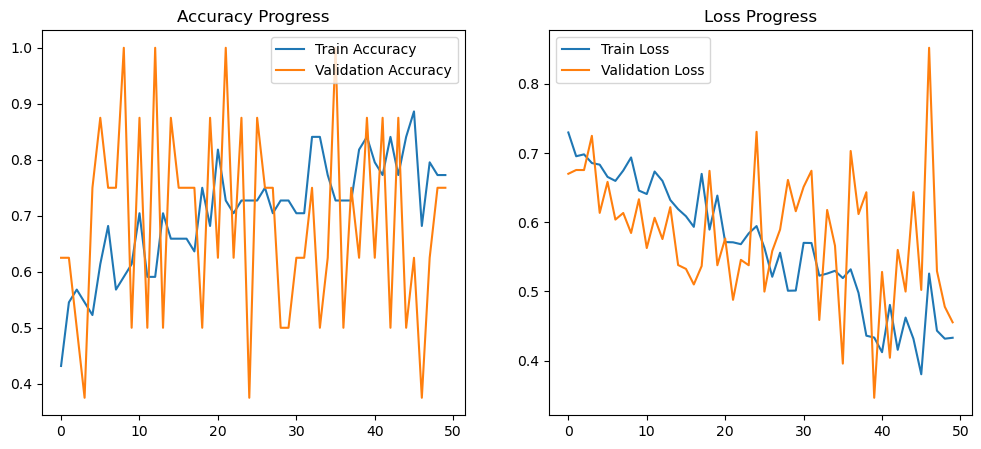

In [27]:
# Plot accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Progress')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Progress')
plt.legend()
plt.show()

# Step 8: Evaluate Model Performance​

In [28]:
# Get final metrics
val_loss, val_acc = model.evaluate(val_generator)
print(f"\nFinal Validation Accuracy: {val_acc*100:.2f}%")
print(f"Final Validation Loss: {val_loss:.4f}")

# Generate predictions
y_pred = model.predict(val_generator)
y_pred = (y_pred > 0.5).astype(int)  # Convert to 0/1 labels

# Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(val_generator.classes, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Classification report
from sklearn.metrics import classification_report
print("\nClassification Report:")
print(classification_report(val_generator.classes, y_pred, 
                            target_names=['Cat', 'Dog']))

3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.5813 - loss: 0.5092

Final Validation Accuracy: 60.00%
Final Validation Loss: 0.5328
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step

Confusion Matrix:
[[3 2]
 [4 1]]

Classification Report:
              precision    recall  f1-score   support

         Cat       0.43      0.60      0.50         5
         Dog       0.33      0.20      0.25         5

    accuracy                           0.40        10
   macro avg       0.38      0.40      0.38        10
weighted avg       0.38      0.40      0.38        10



# Step 9: Test with Your Own Images


Testing image: C:\Users\PC\Desktop\Pet_Images\Cat\pexels-katarzyna-modrzejewska-495044-1314550.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


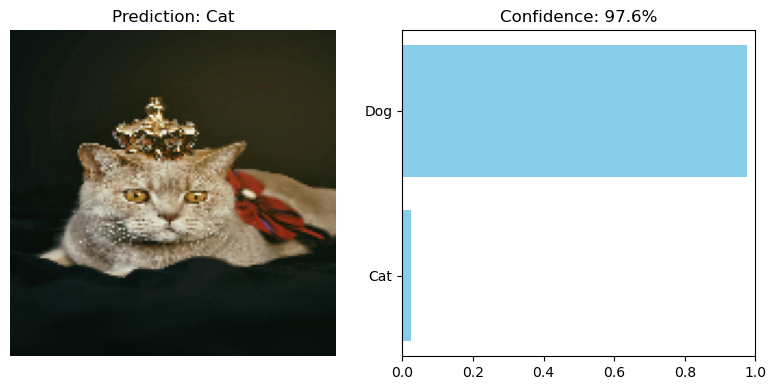


Testing image: C:\Users\PC\Desktop\Pet_Images\Dog\pexels-zante-6122752.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


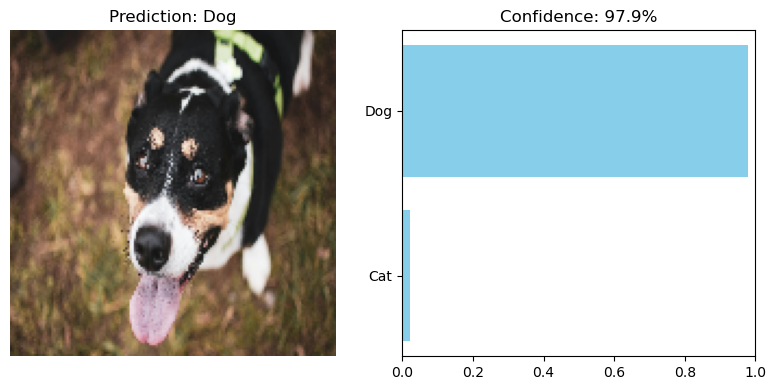

In [54]:
dataset_path = r"C:\Users\PC\Desktop\Pet_Images"

import os
from IPython.display import display, Image as IPImage

def predict_single_image(image_path):
    try:
        # Verify file exists
        if not os.path.exists(image_path):
            raise FileNotFoundError(f"Image not found at: {image_path}")
            
        # Load and preprocess image
        img = tf.keras.utils.load_img(
            image_path, 
            target_size=(150, 150),
            color_mode='rgb'
        )
        img_array = tf.keras.utils.img_to_array(img)/255.0
        img_array = np.expand_dims(img_array, axis=0)
        
        # Make prediction
        prediction = model.predict(img_array)
        class_name = "Dog" if prediction[0][0] > 0.5 else "Cat"
        confidence = prediction[0][0] if class_name == "Dog" else (1 - prediction[0][0])
        
        # Display results
        plt.figure(figsize=(8,4))
        plt.subplot(1,2,1)
        plt.imshow(img)
        plt.title(f"Prediction: {class_name}")
        plt.axis('off')
        
        plt.subplot(1,2,2)
        plt.barh(['Cat', 'Dog'], [1-confidence, confidence], color='skyblue')
        plt.xlim(0, 1)
        plt.title(f"Confidence: {confidence*100:.1f}%")
        plt.tight_layout()
        plt.show()
        
    except Exception as e:
        print(f"Error: {str(e)}")
        print("Available files in Cat folder:")
        display_folder_contents(os.path.join(dataset_path, 'Cat'))
        print("\nAvailable files in Dog folder:")
        display_folder_contents(os.path.join(dataset_path, 'Dog'))

def display_folder_contents(folder_path):
    if os.path.exists(folder_path):
        print(f"Files in {folder_path}:")
        for i, fname in enumerate(os.listdir(folder_path)):
            print(f"{i+1}. {fname}")
            if i < 3:  # Display first 3 images
                display(IPImage(os.path.join(folder_path, fname)))
    else:
        print(f"Folder {folder_path} does not exist")

# Test with corrected paths - ADJUST THESE TO YOUR ACTUAL PATHS!
test_images = [
    os.path.join(dataset_path, 'Cat', 'pexels-katarzyna-modrzejewska-495044-1314550.jpg'),  # Replace with your actual filename
    os.path.join(dataset_path, 'Dog', 'pexels-zante-6122752.jpg')  # Replace with your actual filename
]

for img_path in test_images:
    print(f"\n{'='*40}\nTesting image: {img_path}")
    predict_single_image(img_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


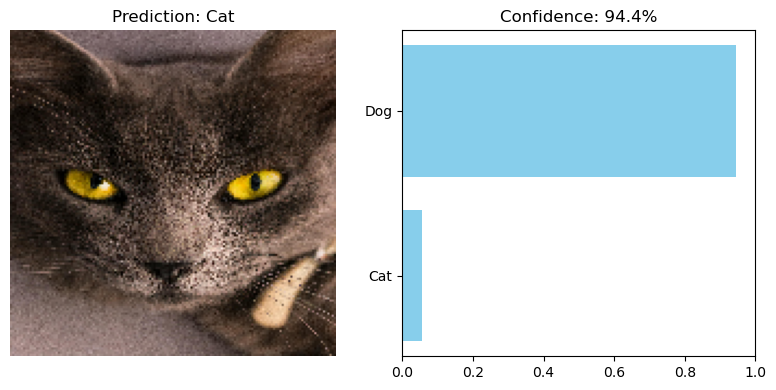

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


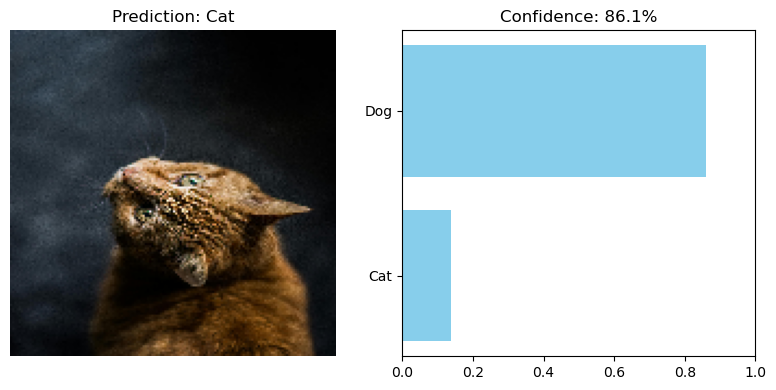

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


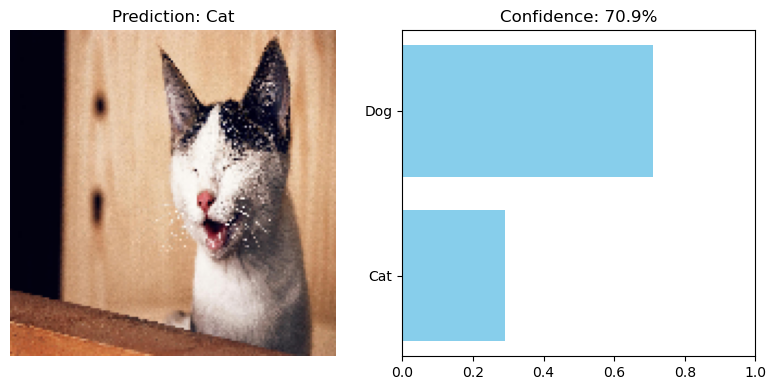

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


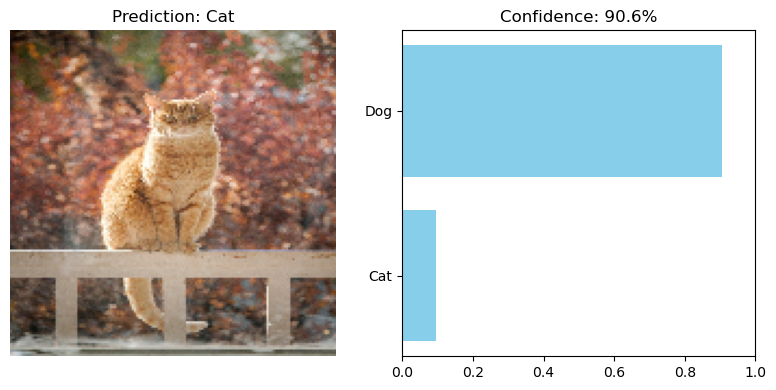

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


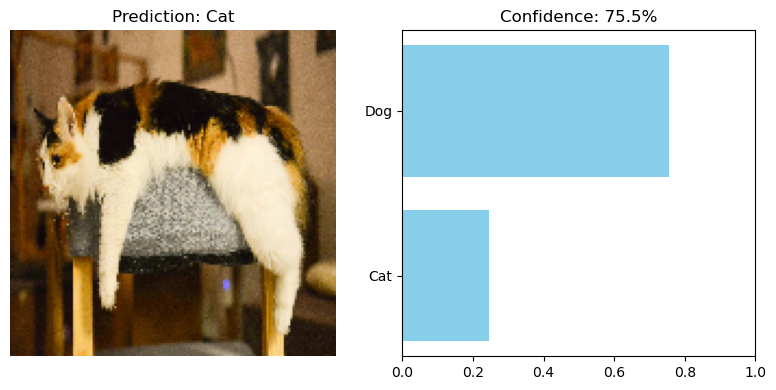

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


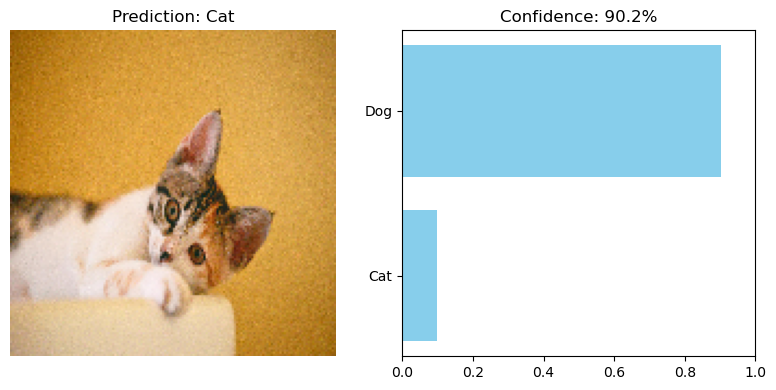

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


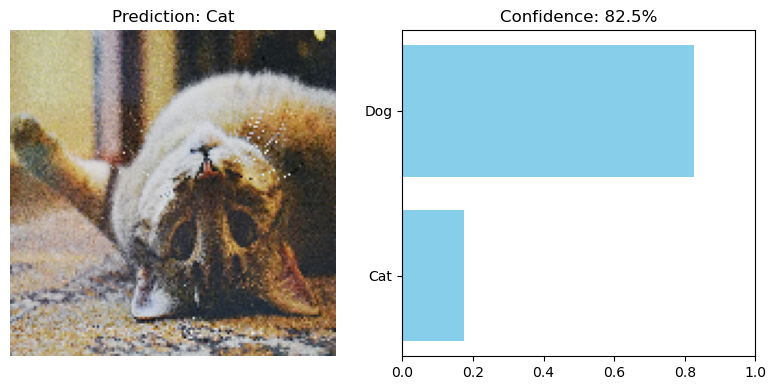

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


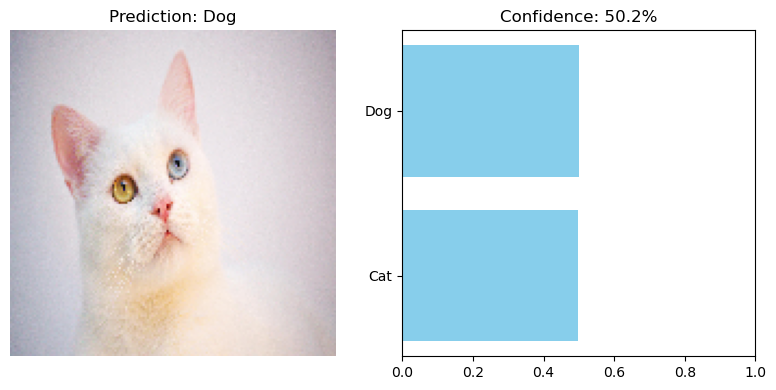

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


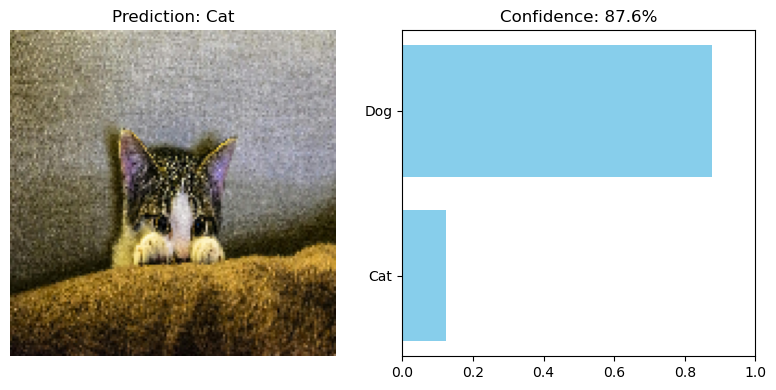

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


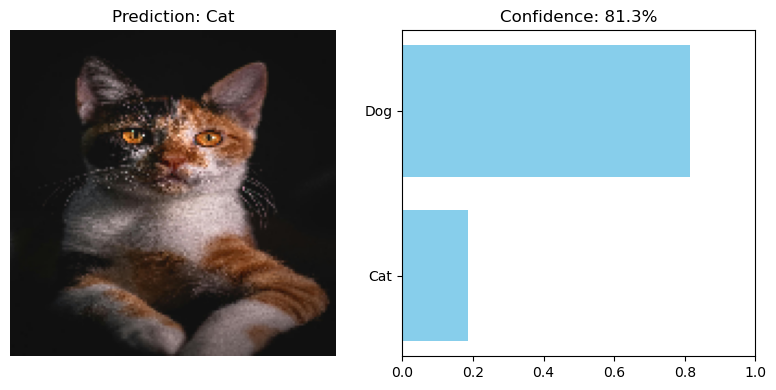

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


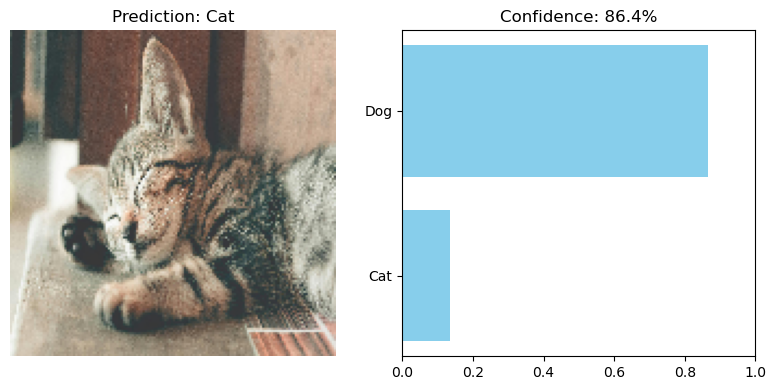

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


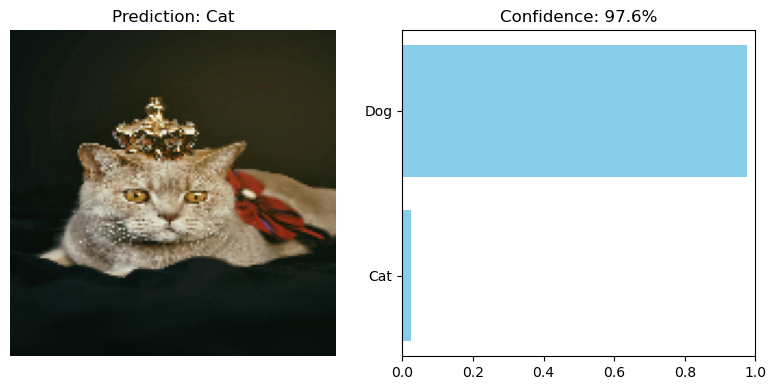

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


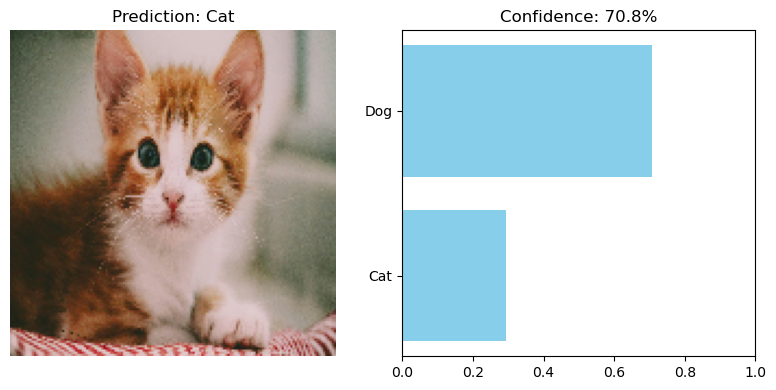

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


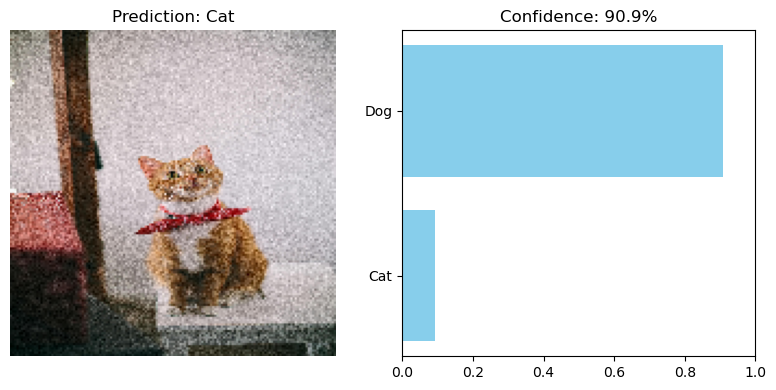

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


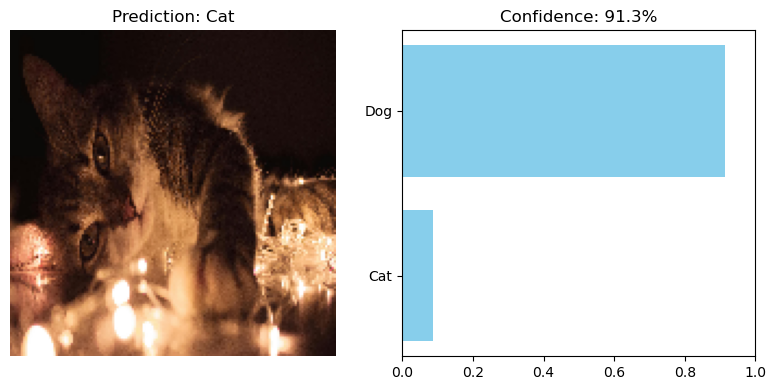

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


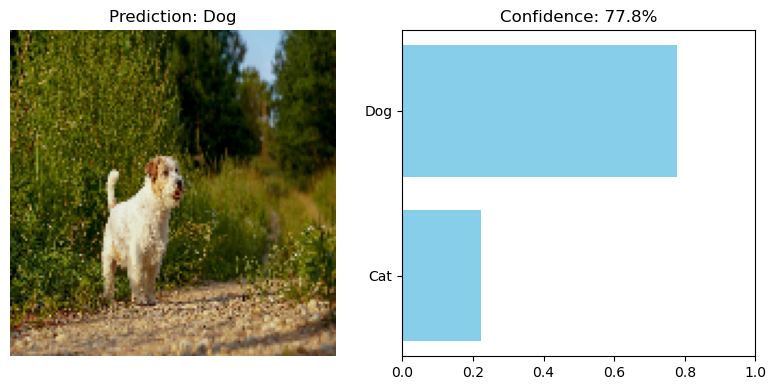

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


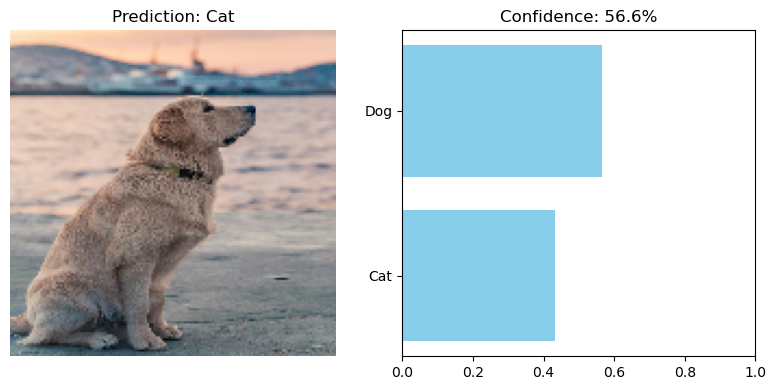

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


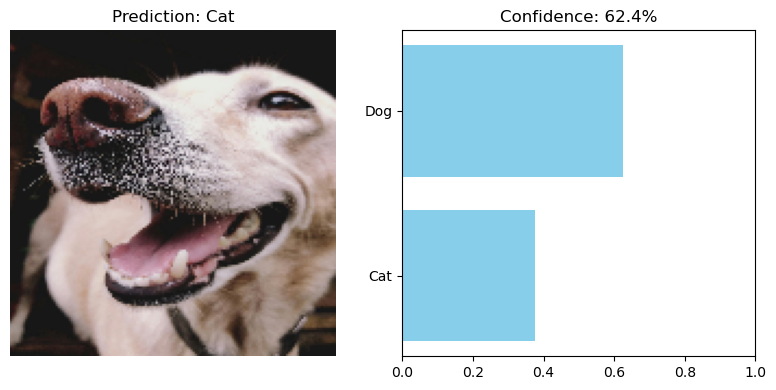

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


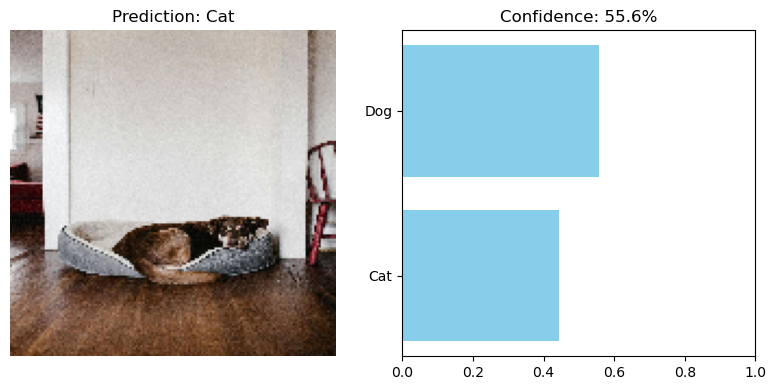

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


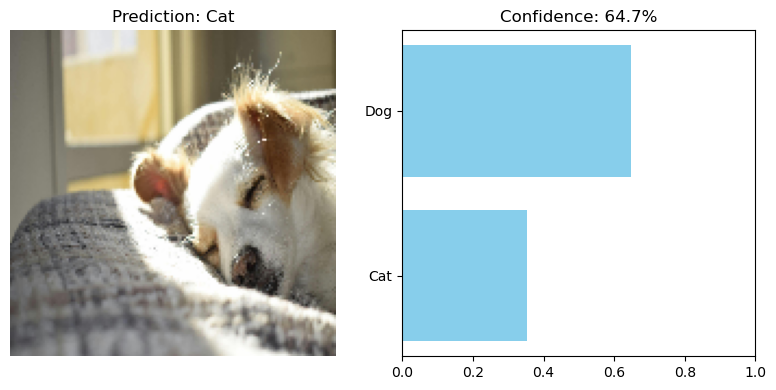

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


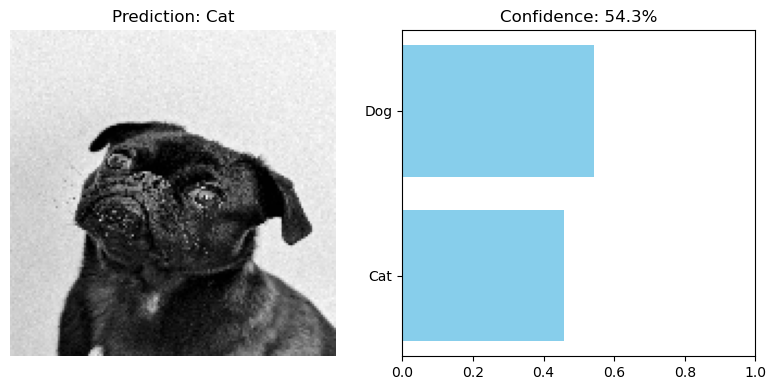

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


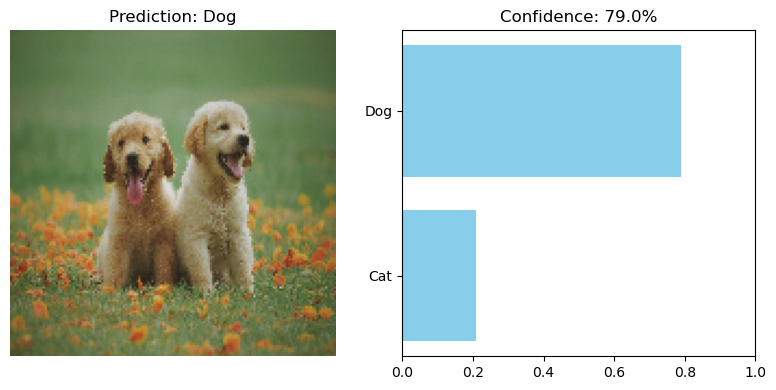

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


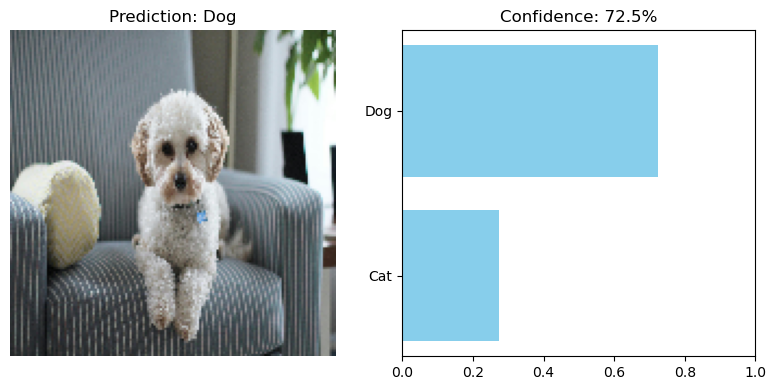

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


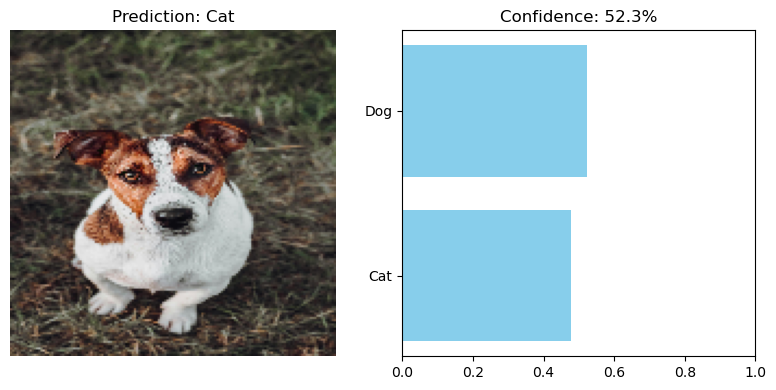

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


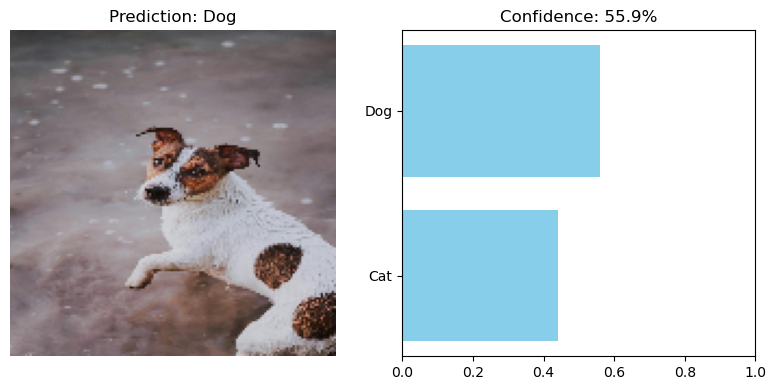

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


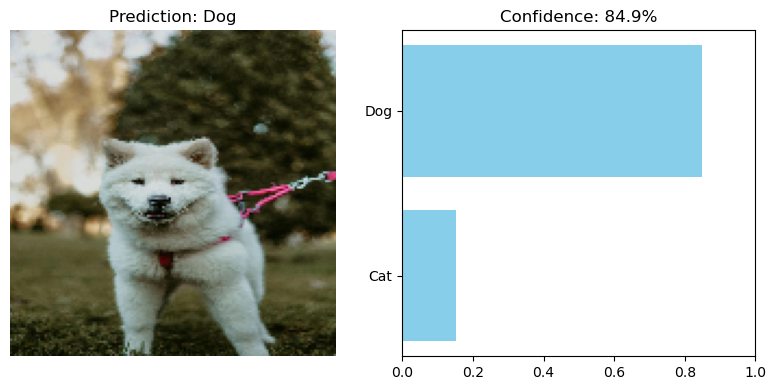

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


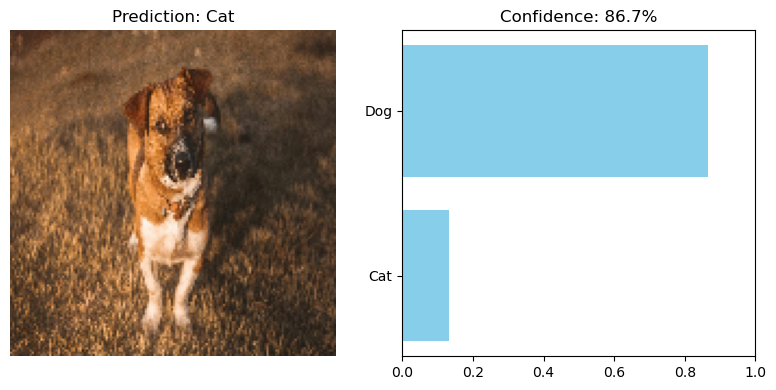

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


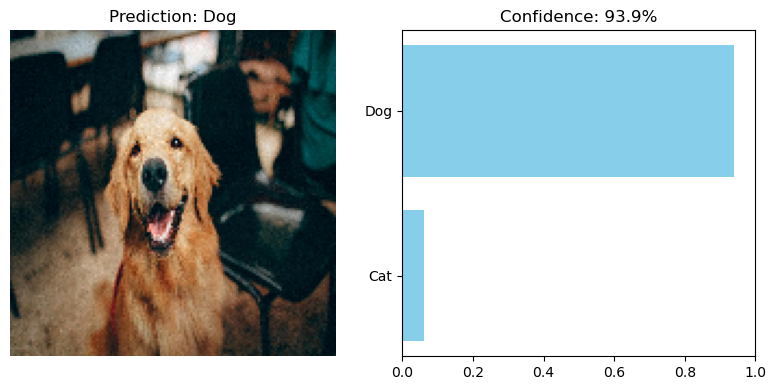

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


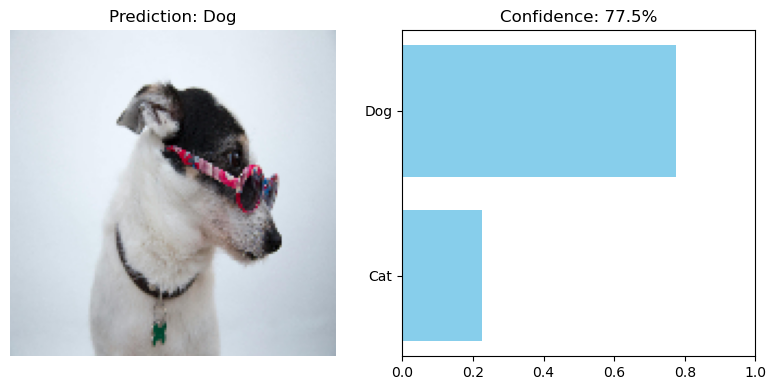

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


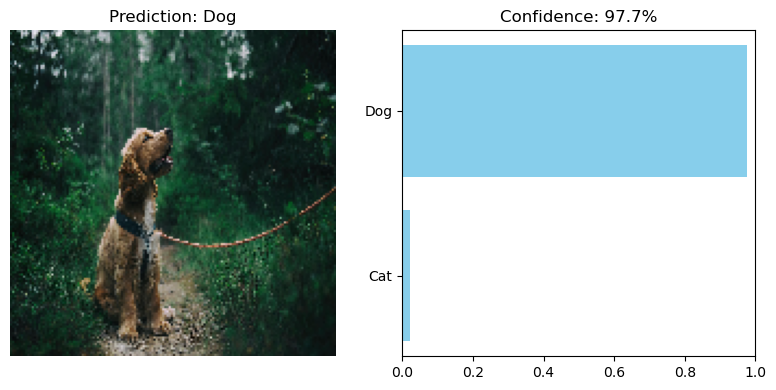

In [58]:
# Add this to automatically detect test images
def get_test_samples(num_samples=15):
    test_images = []
    for class_name in ['Cat', 'Dog']:
        class_path = os.path.join(dataset_path, class_name)
        if os.path.exists(class_path):
            images = [os.path.join(class_path, f) for f in os.listdir(class_path)][:num_samples]
            test_images.extend(images)
    return test_images

# Use like this
test_images = get_test_samples()
for img_path in test_images:
    predict_single_image(img_path)